# Word Cloud for Twitter data

In [23]:
# import libraries

import pandas as pd
import re

from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [24]:
# load dataset

dataset = pd.read_csv('cardano_tweets_clean.csv')
dataset.head()

,ID,Text,UserName,UserFollowerCount,RetweetCount,Likes,CreatedAt
0,1424255322978410502,RT : I'm giving away 500 $ADA worth ($700) to ...,Chris Naylor #CSC #XRP #ADA #XVG,48,283,0,Sun Aug 08 06:25:05 +0000 2021
1,1424255311309856776,Bitcoin Price Breaks $44k Level ! Massive BTC ...,COIN MINERS,2692,0,0,Sun Aug 08 06:25:02 +0000 2021
2,1424255285019938820,Crypto ETHADANew stars shining very soon.. It'...,Raul,49,0,0,Sun Aug 08 06:24:55 +0000 2021
3,1424255261154455554,Crypto ETHADANew stars shining very soon.. It'...,Raul,49,0,0,Sun Aug 08 06:24:50 +0000 2021
4,1424255257522049025,RT : Cardano $ADA just saw a 46% gain over 18 ...,Oscar Garcia,5888,13,0,Sun Aug 08 06:24:49 +0000 2021


In [25]:
# Tweet Text cloumn

tweet = dataset["Text"]
tweet.head()

0    RT : I'm giving away 500 $ADA worth ($700) to ...
1    Bitcoin Price Breaks $44k Level ! Massive BTC ...
2    Crypto ETHADANew stars shining very soon.. It'...
3    Crypto ETHADANew stars shining very soon.. It'...
4    RT : Cardano $ADA just saw a 46% gain over 18 ...
Name: Text, dtype: object

In [27]:
# shape of tweets (Number of tweets)
tweet.shape

(110217,)

In [28]:
# clean all tweets

'''
Removing emojis and symbols
Removing urls
Removing @mentions and hash symbols
HTML to text
'''

token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [29]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')

re_list = ['@[A-Za-z0–9_]+', '#']

combined_re = re.compile( '|'.join( re_list) )

In [30]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,10000): #10000 columns in our dataframe
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,10000))                                                                  
    cleaned_tweets.append(cleaning_tweets((tweet[i])))

Cleaning the tweets...

Tweets 100 of 10000 have ben processed
Tweets 200 of 10000 have ben processed
Tweets 300 of 10000 have ben processed
Tweets 400 of 10000 have ben processed
Tweets 500 of 10000 have ben processed
Tweets 600 of 10000 have ben processed
Tweets 700 of 10000 have ben processed
Tweets 800 of 10000 have ben processed
Tweets 900 of 10000 have ben processed
Tweets 1000 of 10000 have ben processed
Tweets 1100 of 10000 have ben processed
Tweets 1200 of 10000 have ben processed
Tweets 1300 of 10000 have ben processed
Tweets 1400 of 10000 have ben processed
Tweets 1500 of 10000 have ben processed
Tweets 1600 of 10000 have ben processed
Tweets 1700 of 10000 have ben processed
Tweets 1800 of 10000 have ben processed
Tweets 1900 of 10000 have ben processed
Tweets 2000 of 10000 have ben processed
Tweets 2100 of 10000 have ben processed
Tweets 2200 of 10000 have ben processed
Tweets 2300 of 10000 have ben processed
Tweets 2400 of 10000 have ben processed
Tweets 2500 of 10000 have

#### pandas.Series.str.cat() to concatenate the strings in the list cleaned_tweets separated by ''.

In [31]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

## Generating Word Cloud

Stopwords are the commonly occurring words in English language such as “the”, “a”, “an”, “in”… that don’t add much meaning to sentences. These words are ignored in natural language processing tasks. We can add our own stopwords as per our need. We know the words like “elonmusk”,”elon musk”,”elon”,”musk”… will be very common in tweets with hashtag #SpaceX. So we add them to stopwords list and they won’t appear in the word cloud.

In [32]:

stopwords = set(STOPWORDS)
stopwords.update(["elonmusk","elon musk","elon","musk","spacex"]) #adding our own stopwords

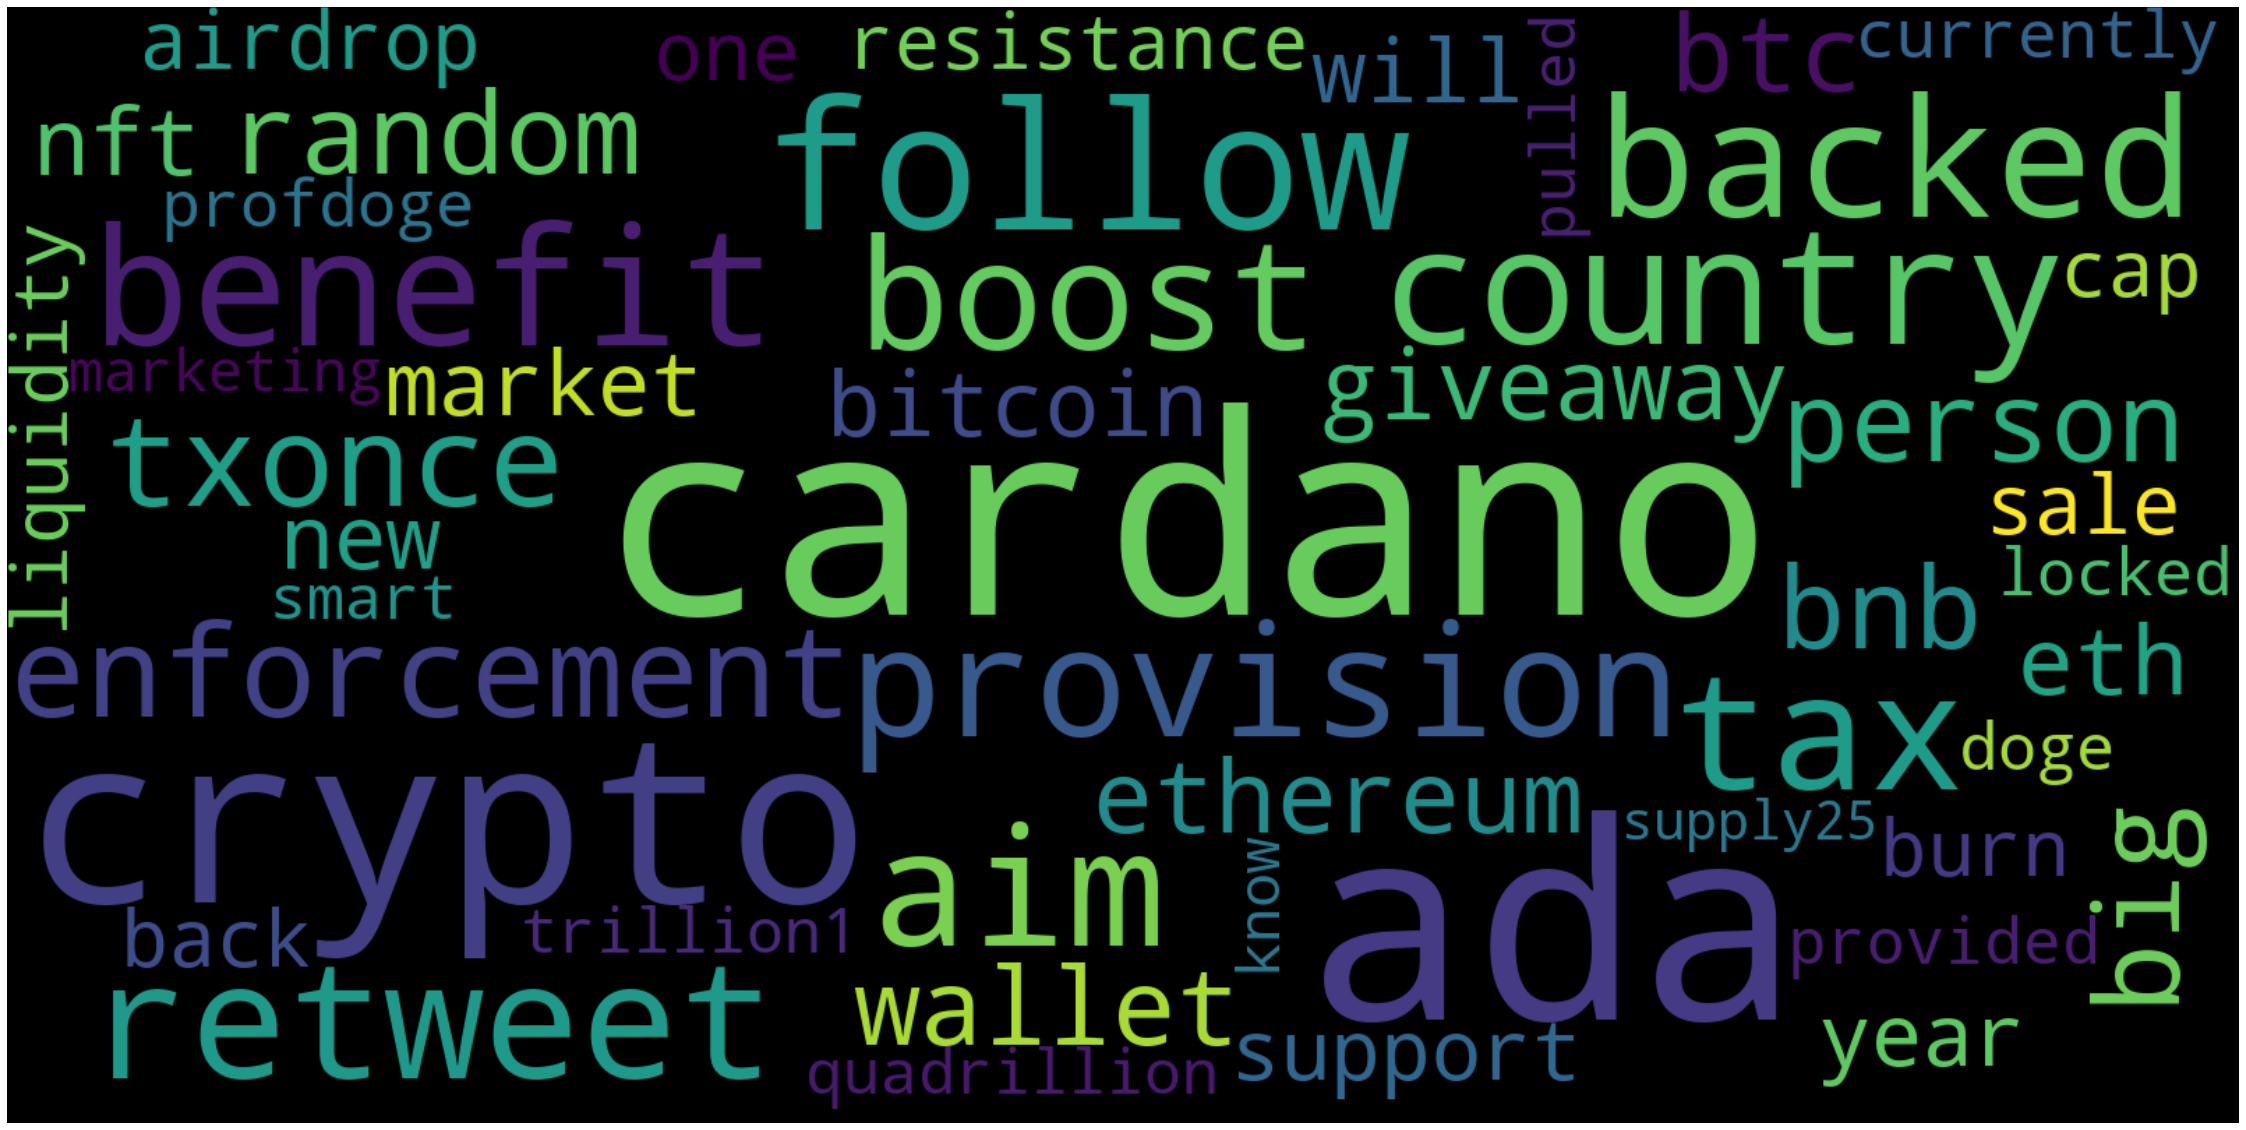

In [33]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Custom Word Clouds

We can generate custom word clouds with the additional argument mask in WordCloud().
Upload your own image in your path and the below code will do the rest. This works the best with images having white backgrounds.

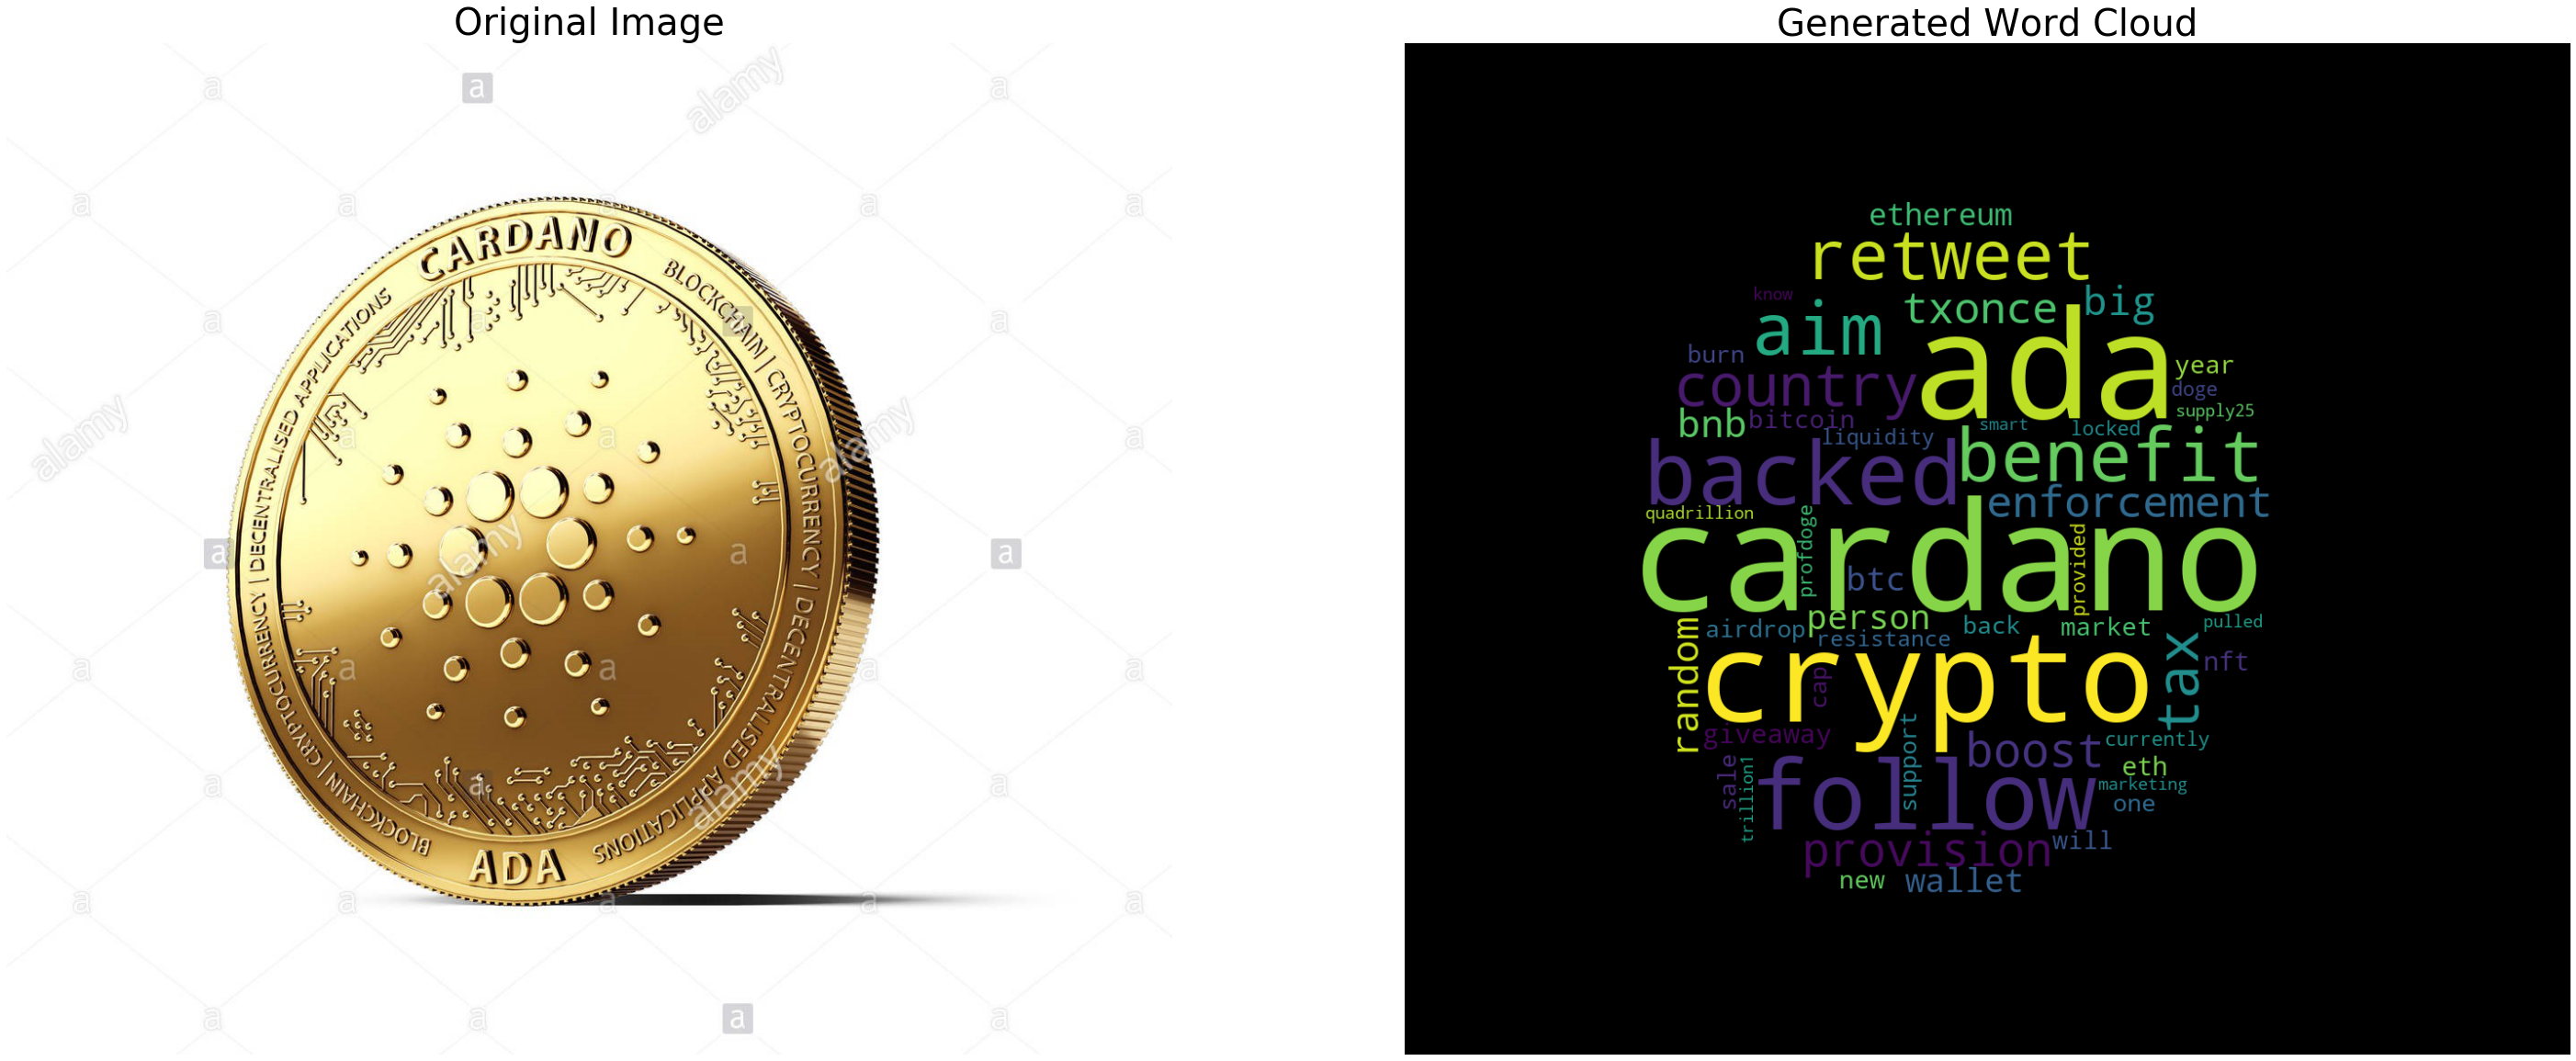

In [36]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('./ada.jpg'))
wordcloud = WordCloud(width=1600, mask =   mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False).generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Image', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Generated Word Cloud', size=40)
plt.axis("off")
plt.show()